In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import bernoulli
from scipy.stats import binom

In [2]:
df=pd.read_csv('Sample - Superstore.csv', encoding='latin-1')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
import core as kl

In [7]:
kl.cal_stats(df['Profit'])

Total Revnue 286397.0217
count 9994
average 28.65689630778467
Median 8.6665
minimum -6599.978
Maximum 8399.976
Range 14999.954000000002
variance 54872.30698092883
Standard deviation 234.24838736035906
quaritile 1 1.72875
quaritile 3 29.364
inter quatile range 27.63525
low whisker -39.724125
upper whisker 70.816875


In [8]:
df['Profit']

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

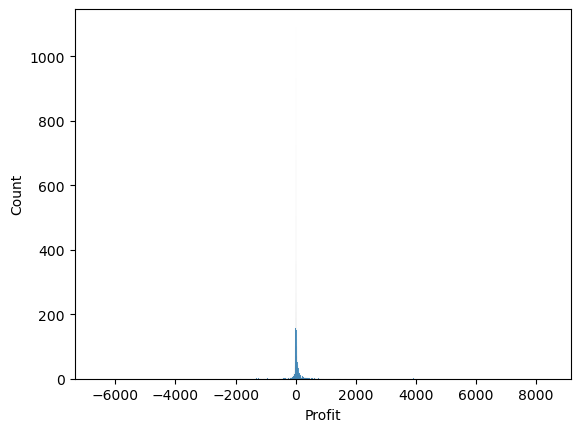

In [9]:
sns.histplot(df['Profit'])
plt.show()

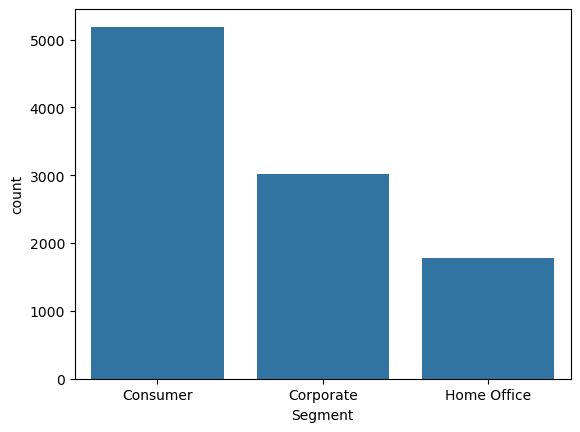

In [10]:
sns.countplot(x='Segment',data=df)
plt.show()

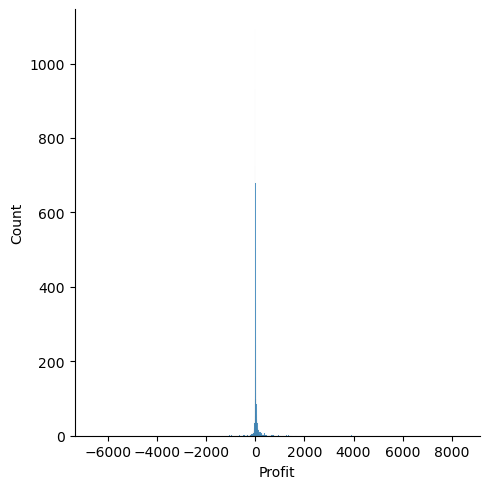

In [11]:
sns.displot(df['Profit'])
plt.show()

In [12]:
df.corr(numeric_only=True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [13]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [14]:
region_count=df['Region'].value_counts()
region_count.values




array([3203, 2848, 2323, 1620], dtype=int64)

In [15]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [16]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [17]:
Monthly_sales=df.resample('ME',on='Order Date')['Sales'].sum()

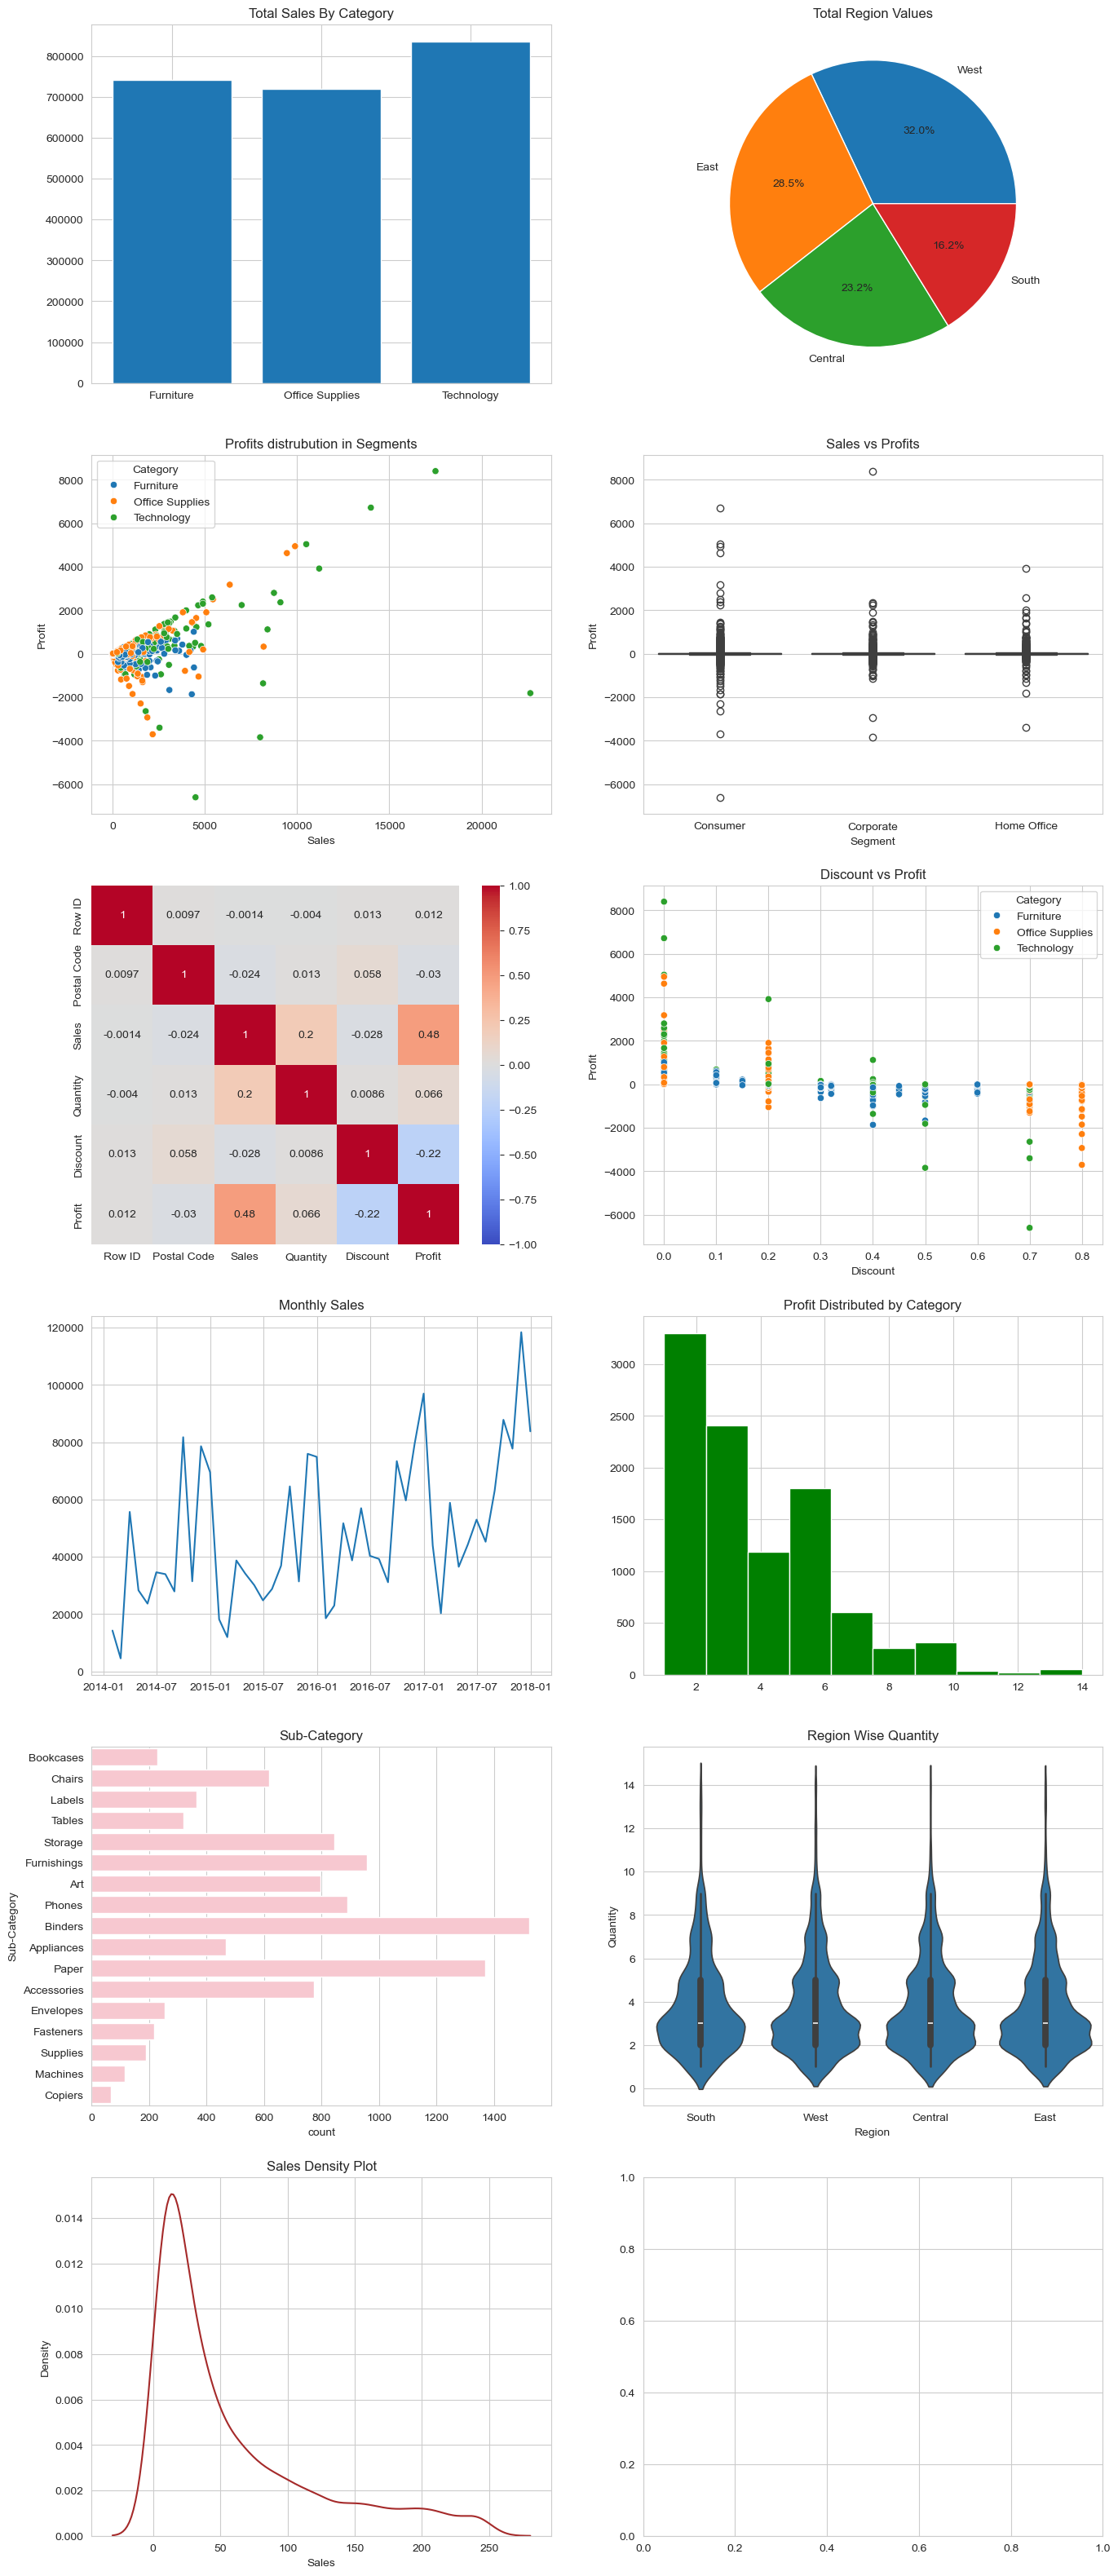

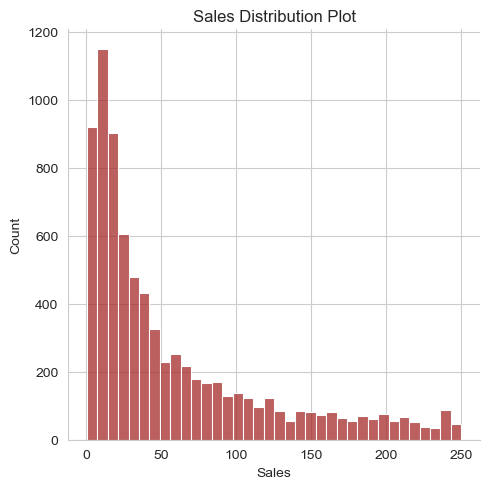

In [18]:
# setting the figure size

plt.figure(figsize=(16,40))
sns.set_style("whitegrid")

#setting of barplot
plt.subplot(6,2,1)
category_wise_sales=df.groupby('Category')['Sales'].sum()
plt.bar(category_wise_sales.index,category_wise_sales.values)
plt.title('Total Sales By Category')
import matplotlib.pyplot as plt
plt.ylabel=('Sales')

#bieplot
plt.subplot(6,2,2)
region_count=df['Region'].value_counts()
plt.pie(region_count.values,labels=region_count.index,autopct="%0.1f%%")
plt.title("Total Region Values")
plt.xlabel=('Sales')
plt.ylabel=('Profit')


#scatterplot
plt.subplot(6,2,3)
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Category')
plt.title("Profits distrubution in Segments")


#boxplot
plt.subplot(6,2,4)
sns.boxplot(data=df,x='Segment',y='Profit')
plt.title('Sales vs Profits')


#correlation heatmap
plt.subplot(6,2,5)
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,cmap='coolwarm')


#scatterplot
plt.subplot(6,2,6)
sns.scatterplot(data=df,x='Discount',y='Profit',hue='Category')
plt.xlabal='Discount'
plt.ylabel='Profit'
plt.title("Discount vs Profit")

#lineplot
plt.subplot(6,2,7)
Monthly_sales=df.resample('ME',on='Order Date')['Sales'].sum()
plt.plot(Monthly_sales.index,Monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabal='Month'
plt.ylabal='Sales'

#histogram
plt.subplot(6,2,8)
plt.hist(df['Quantity'],bins=10,color='Green')
plt.title('Profit Distributed by Category')

#count plot
plt.subplot(6,2,9)
sns.countplot(df['Sub-Category'],color='Pink')
plt.title('Sub-Category')

#violinplot
plt.subplot(6,2,10)
sns.violinplot(data=df,x='Region',y='Quantity')
plt.title('Region Wise Quantity')

#kde plot
plt.subplot(6,2,11)
sns.kdeplot(df['Sales'][df['Sales']<250],color='brown')
plt.title('Sales Density Plot')



#distribution 
plt.subplot(6,2,12)
sns.displot(df['Sales'][df['Sales']<250],color='brown')
plt.title('Sales Distribution Plot')






plt.tight_layout()
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

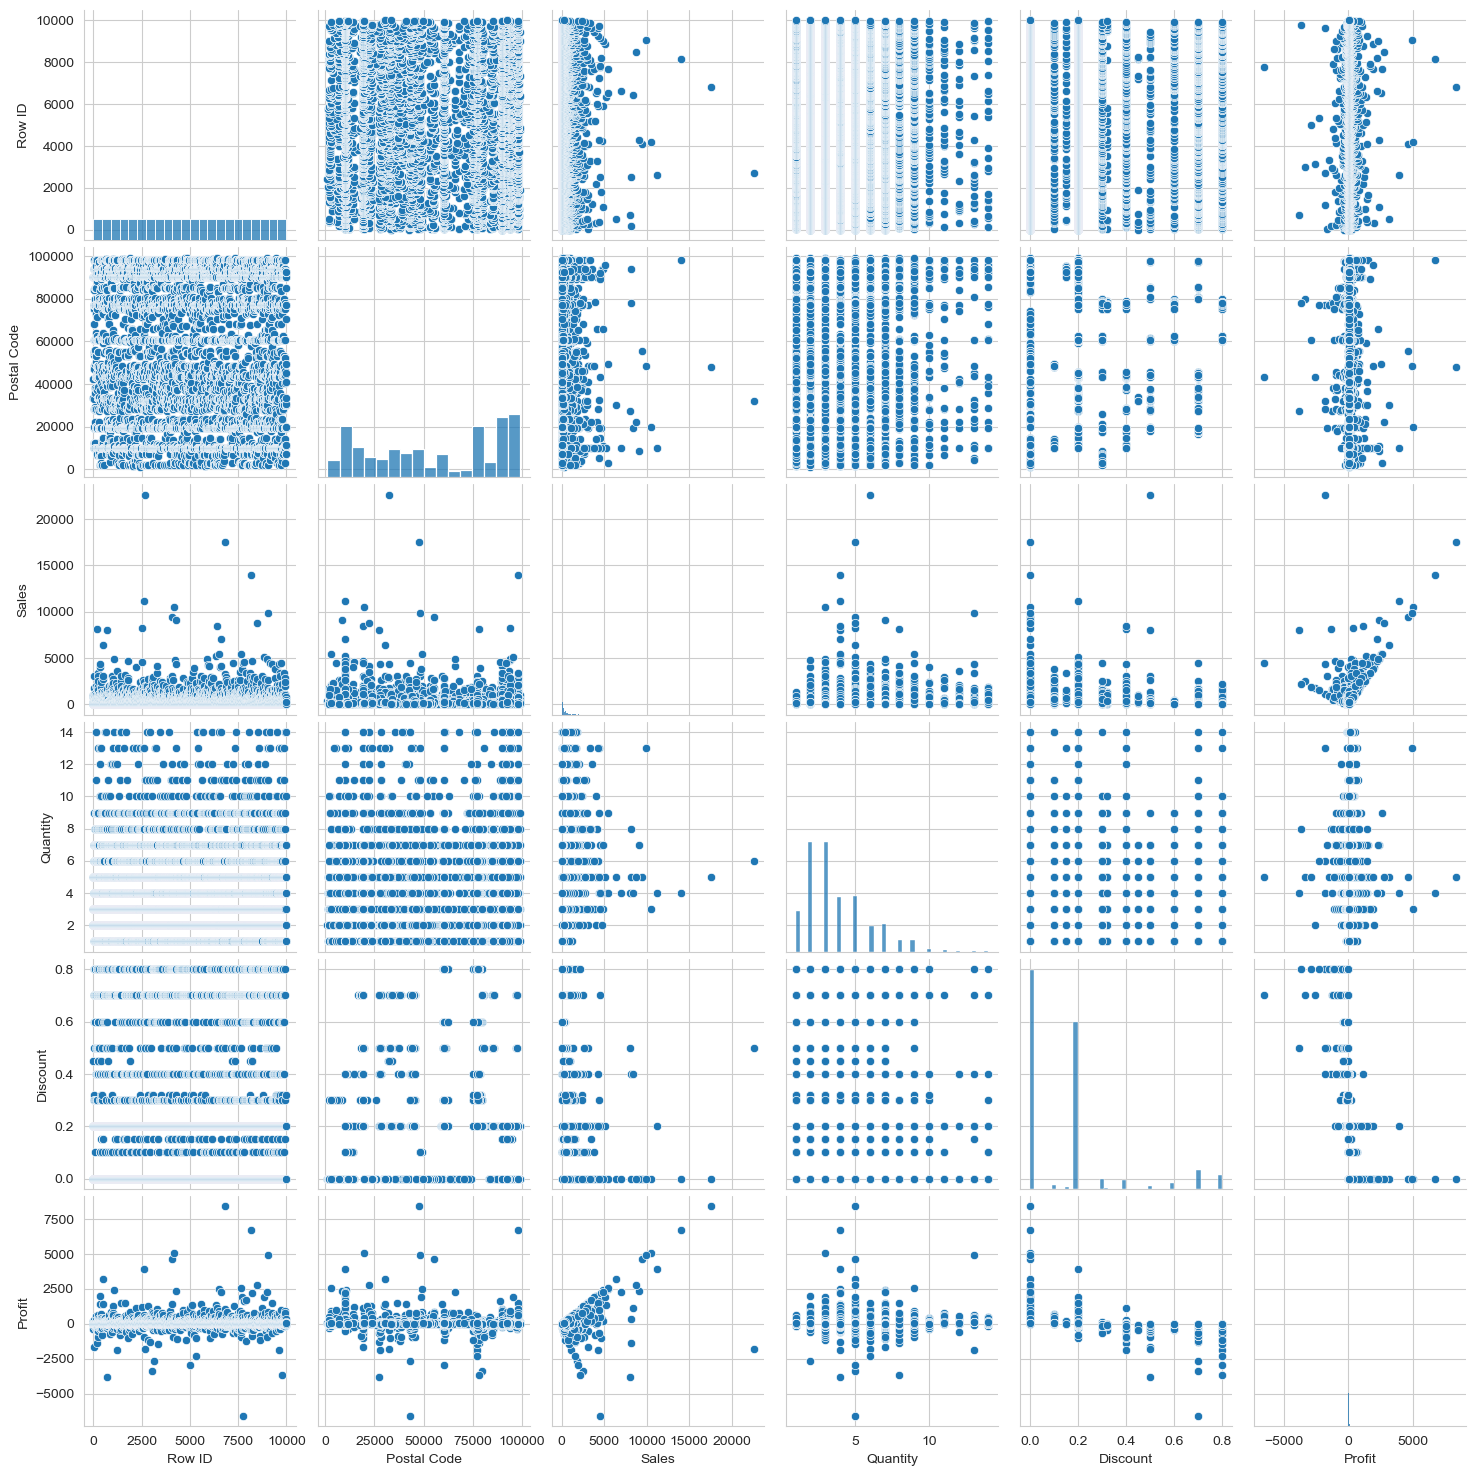

In [20]:
sns.pairplot(df)

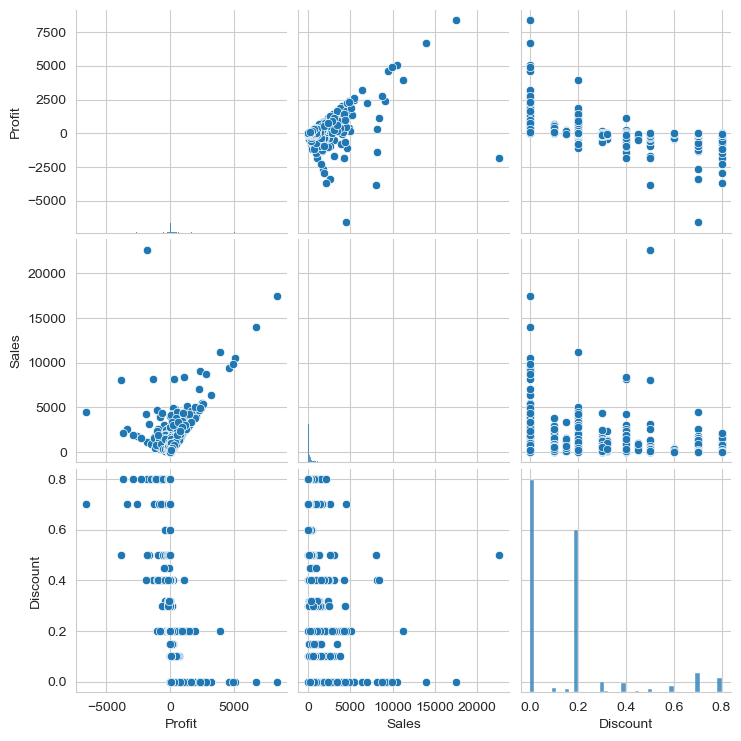

In [21]:
sns.pairplot(df[['Profit','Sales','Discount']])
plt.show()

In [22]:
def ci(data,confidence):
    z_score=st.norm.ppf(1-(1-confidence)/2)
    mean_translations=np.mean(data)
    std_translations=np.std(data)
    n=len(data)
    moe=(z_score*std_translations)/np.sqrt(n)
    print(f'{int(confidence*100)}% confidence interval is:{round(mean_translations-moe,2)},{round(mean_translations+moe,2)}')


In [23]:
ci(df['Profit'],0.99)

99% confidence interval is:22.62,34.69


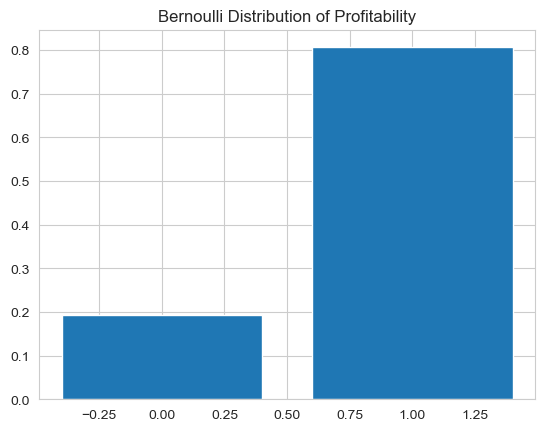

In [24]:

# new column for profit of > 1  <0
df['Profitable']=np.where(df['Profit'] > 0,1,0)

p_success=df['Profitable'].mean()

bernoulli_rv=bernoulli(p_success)

x=[0,1]
y=bernoulli_rv.pmf(x)

plt.bar(x,y)
plt.xticks=([0,1],['Loss/Break-even(0)','Profit(1)'])
plt.title('Bernoulli Distribution of Profitability')
plt.ylabel=('Probability')
plt.show()

In [25]:
(df['Profitable'].value_counts()/len(df['Profitable']))*100

Profitable
1    80.628377
0    19.371623
Name: count, dtype: float64

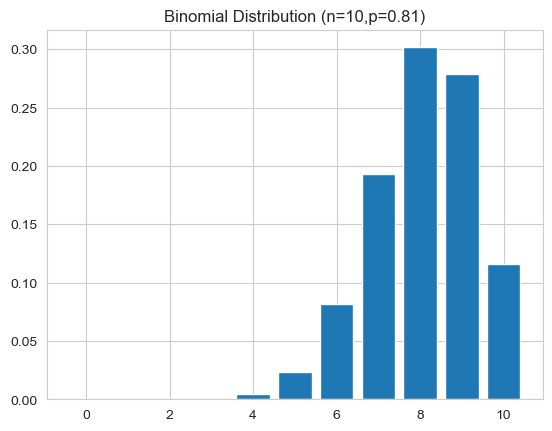

In [26]:
n=10 #number of order series
x=np.arange(0,n+1)

binom_rv=binom(n,p_success)
y=binom_rv.pmf(x)

#plotting 
plt.bar(x,y)
plt.title(f'Binomial Distribution (n={n},p={p_success:.2f})')
plt.xlabel=('Number of Profitable Order in 10')
plt.ylalel=('Probability')
plt.show()

In [27]:
round(df['Profit'].mean(),2)

28.66

In [28]:
ci(df['Profit'],0.95)


95% confidence interval is:24.06,33.25


In [29]:
ci(df['Profit'],1)

100% confidence interval is:-inf,inf


In [30]:
from scipy.stats import t
import numpy as np

##Catagory
tech_data=df[df['Category']=='Technology']['Sales']

##sample
sample_mean=np.mean(tech_data)
sample_std=np.std(tech_data,ddof=1)


##Calculation
confidence_level=0.99
alpha=1-confidence_level
t_critical=t.ppf(1-alpha/2,df=n-1)

##margin
margin_of_error=t_critical*(sample_std/np.sqrt(n))


##Confidence interval
lower_bound=sample_mean-margin_of_error
upper_bound=sample_mean+margin_of_error

print(f"99% confidence interval for mean sales in Technology: ({round(lower_bound,2)},{round(upper_bound,2)})")

99% confidence interval for mean sales in Technology: (-686.64,1592.06)
